$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

# Finite Difference Formulation of the Incompressible Navier Stokes Equation

To solve the incompressible Navier Stokes (N.S.) equation we need to have a good understanding of the pre-requisites to obatin a solution. In 2 dimensions we have the velocities $u_1$ and $u_2$ and the pressure $p$. Thus we would need three equations, namely the two momentum conservation equation (the N.S. equation) and the continuity equation, i.e. $\nabla \cdot \vb{u}=0$.

For the incompressible formulation, the pressure field serves the purpose to modify the flow field such that it remains divergence free. If the flow field is compressible, we have an explicit equation (equation of state) relating the pressure with the density and the continuity equation.

Coming back to the incompressibel N.S. equation, we can derive from it a 3 third equation, the so-called pressure Poisson equation. For this we need to take some derivatives to the N.S. equation and use the continuity equation. The result is a Poisson equation for the pressure. Details of the derivation [are stated here.](http://www.thevisualroom.com/poisson_for_pressure.html)


The Navier Stokes Equations for $u$ and $v$, Eq. (1-2) and the pressure Poisson equation (3) are:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right)\tag{1}$$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)\tag{2}$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)\tag{3}\quad .$$


We can derive an explicit numerical scheme to solve the equations (1-3) which is rather similar to our [Laplace Equation.](notebooks/07_Solving the Laplace Equation numerically.ipynb)

<div class="Detail">
**A finite difference scheme for the Navier Stokes Equation**
<p>
If you are not interested in the working of the N.S. solver you can skip below information.<p>

We calculate the pressure field assuming that the current flow field is not divergent free, $\nabla \vb{u}^{n+1/2}\neq0$. 

$$\nabla^2 p^{n+1}=\frac{\rho}{\Delta t}\nabla\cdot\vb{u}^{n+1/2}-\rho\left(\left(\pad{u}{x}\right)^2+2\pad{u}{y}\pad{v}{x}+\left(\pad{u}{y}\right)^2\right)$$

which discretizes as:

$$ \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\quad .$$

<p>** Pressure boundary conditions **<p>

The pressure boundary conditions have to be carefully evaluated. We can write the N.S. equation as

$$\nabla p= \rho \left( -\pad{\vb{u}}{t}-\vb{u}\cdot\nabla\vb{u}+\nu\nabla^2\vb{u}\right)\quad.$$

Then we mutiply on both sides with the normal vector of the boundary $\vb{n}$ and obtain a  Neumann b.c. for the pressure:

$$\vb{n}\cdot\nabla p=\rho \vb{n}\cdot\left( -\pad{\vb{u}}{t} -\vb{u}\cdot\nabla\vb{u}+\nu\nabla^2\vb{u}\right)\quad.$$

On a rigid boundary, $u_1$ and $u_2$ are 0, thus the b.c. simplifies. An example is the following, the boundary condition for a rigid boundary with $y=0$ we obtain:
$$\pad{p}{y}=\rho \nu \ppad{u_2}{x_2}\quad .$$

<p>** Finite difference scheme for the boundary nodes **<p>

To evaluate the above pressure gradient, we need to calculate the second derivative of the velocity on the boundary. Our previous scheme using the central difference does not work here, as we can't evaluate past the boundary. Instead we approximate the second derivative with

$$\left.\ppad{v}{y}\right|_{i,j=0}=\frac{1}{\Delta y^2}\left(v_{i,j=0}-2 v_{i,j=1}+v_{i,j=2}\right)$$


<p>** Discretization of the velocity field Eq. (1) and (2) **<p>

Then we calculate the velocity field $\vb{u}^{n+1}$ using the above calculated pressure field.

The momentum equation in the $u$ direction:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

The momentum equation in the $v$ direction:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$
</div>


## The solver
Below you find two functions to solve the N.S. equations (1-2) and the Poisson equation for the pressure (3). The functions ``presPoisson()`` and ``NSFlow()`` solve the Eq. (3) and Eqs. (1-2), respectively.

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def presPoisson(p, dx, dy, rho, nu, u, v):
    #Term in square brackets of Eq. (3)
    b[1:-1,1:-1]=rho*(1/dt*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx)+(v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))-\
                 ((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx))**2-\
                 2*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dy)*(v[1:-1,2:]-v[1:-1,0:-2])/(2*dx))-\
                 ((v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))**2)

    for q in range(nit):
        pn = p.copy()
        #iteratively solve Eq. (3)
        p[1:-1,1:-1] = ((pn[1:-1,2:]+pn[1:-1,0:-2])*dy**2+(pn[2:,1:-1]+pn[0:-2,1:-1])*dx**2)/\
                        (2*(dx**2+dy**2)) -\
                        dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]
                
        if (case == 'lid'):
            p[-1,:] = p[-2,:] - rho*nu/dy*(-2*v[-2,:]+v[-3,:])
            p[0,:] = p[1,:] - rho*nu/dy*(-2*v[1,:]+v[2,:])
            p[:,0] = p[:,1] - rho*nu/dx*(-2*u[:,1]+u[:,2])
            p[:,-1] = p[:,-2] - rho*nu/dx*(-2*u[:,-2]+u[:,-3])  
        
        if (case == 'tubep'):
            p[-1,:] = p[-2,:] - rho*nu/dy*(-2*v[-2,:]+v[-3,:])
            p[0,:] = p[1,:] - rho*nu/dy*(-2*v[1,:]+v[2,:])
            p[:,0] = Pleft
            p[:,-1] = Pright

        if (case == 'tubev'):
            p[-1,:] = p[-2,:] - rho*nu/dy*(-2*v[-2,:]+v[-3,:])
            p[0,:] = p[1,:] - rho*nu/dy*(-2*v[1,:]+v[2,:])
            p[:,0] = p[:,1] - rho*nu/dx*(-2*u[:,1]+u[:,2])
            p[:,-1] = Pright
            
        if (case == 'ltube'):
            p[-1,:] = p[-2,:] - rho*nu/dy*(-2*v[-2,:]+v[-3,:])
            p[0,:] = p[:,1] - rho*nu/dx*(-2*u[:,1]+u[:,2])
            p[:,0] = Pleft
            p[:,-1] = Pright
            
            
    return p

def NSFlow(nt, u, v, dt, dx, dy, p, rho, nu):
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        p = presPoisson(p, dx, dy, rho, nu, u, v)
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
                        dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,0:-2])+\
                        nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+\
                        dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]))

        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
                        dt/(2*rho*dy)*(p[2:,1:-1]-p[0:-2,1:-1])+\
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])+\
                        (dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])))

        
        if (case == 'lid'):             
            u[0,:] = 0
            u[:,0] = 0
            u[:,-1] = 0
            u[-1,:] = Uwall    #set velocity on cavity lid equal to Uwall
            v[0,:] = 0
            v[-1,:]=0
            v[:,0] = 0
            v[:,-1] = 0
            
        if (case == 'tubep'):
            u[0,:] = 0
            u[:,0] = u[:,1]
            u[:,-1] = u[:,-2]
            u[-1,:] = 0 
            v[0,:] = 0
            v[-1,:]=0
            v[:,0] = 0
            v[:,-1] = 0
            
        if (case == 'tubev'):
            u[0,:] = 0
            u[:,0] = Uwall
            u[:,-1] = u[:,-2]
            u[-1,:] = 0 
            v[0,:] = 0
            v[-1,:]=0
            v[:,0] = 0
            v[:,-1] = 0
            
        if (case == 'ltube'):
            u[0,:] = 0
            u[:,0] = u[:,1]
            u[:,-1] = u[:,-2]
            u[-1,:] = Uwall
            v[0,:] = 0
            v[-1,:]=0
            v[:,0] = 0
            v[:,-1] = 0
        
    return u, v, p

## Play
Three different cases which have different boundary conditions are implemented. You can select the case by changing the variable ``case``:

| case | description  | Variables |
|---|---|---|
| 'lid'  | lid driven cavity, the upper wall moves horizonatlly with $U_{wall}$  | ``Uwall`` |
| 'tubep' | tube or pipe driven by a pressure difference between the left and the right side | ``Pleft``, ``Pright`` |
| 'tubev'  | tube driven by a uniform velocity at the inlet $U_{wall}$ | ``Uwall`` and ``Pright``|

You may also want to change some of the settings of the simulation

| variable name | description  |
|---|---|
| ``nx``, ``ny``| umber of grid points in horizonta/vertical direction|
| ``nt``| number of time steps for the velocity calculation|
| ``nit``| number of iteration steps for the pressure solver|
| ``rho``| density $\rho$|
| ``nu``| kinematic viscosity $\nu$ |
| ``CFL`` | Courant Friedrich Levy parameter, should be below 1% or less for a stable algorithm, smaller values take longer.|



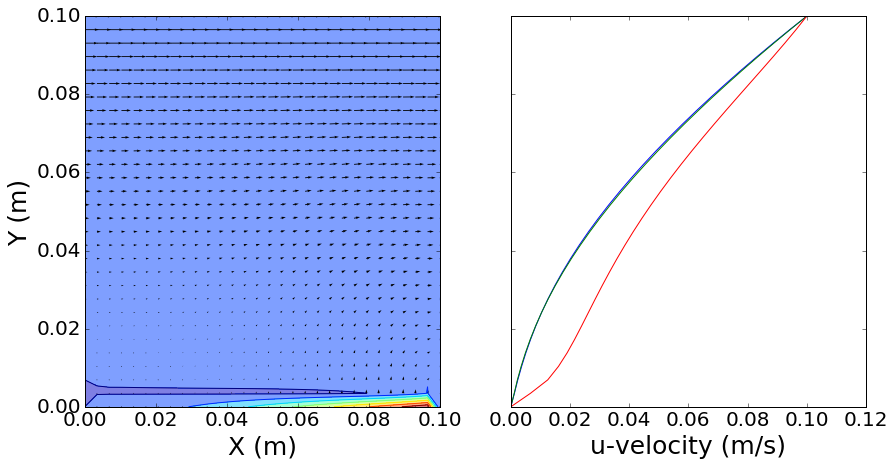

In [37]:
nx = 30    #number of grid points in horizontal direction
ny = 30    #number of grid points in vertical direction
xlen= 0.1  #physical length in horizontal direction in [m]
ylen= 0.1  #physical length in vertical direction in [m]
nt = 1000  #number of time steps each having length dt (see below)
nit = 100  #number of Poisson iterative steps 

dx = xlen/(nx-1)
dy = xlen/(ny-1)
x = np.linspace(0, xlen, nx)
y = np.linspace(0, ylen, ny)
X,Y = np.meshgrid(x, y)

case='ltube'    #choose case, either 'tubep', 'tubev', or 'lid'
Pleft=0.      #pressure left for tube case [Pa]
Pright=0.      #pressure right for tube case [Pa]
Uwall=0.1      #velocity of the wall for the lid-case or the inlet velocity of tubev
rho = 1000     #density of the liquid [kg/m^3]
nu = 0.1       #kinematic viscosity [m^2/s]
CFL = 0.0005    #CFL number sufficientl small to be stable

dt = CFL * dx / Uwall 

u = np.zeros((ny, nx)) #velocity field arrays
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) #pressure field arrays
b = np.zeros((ny, nx)) #this is needed for the Poisson solver

#solve the Equations (1-3)
u, v, p = NSFlow(nt, u, v, dt, dx, dy, p, rho, nu)

#plot the results
f, (ax1, ax2) = plt.subplots(1,2, sharey=True,figsize=(14,7),dpi=100);
ax1.contourf(X, Y, p, alpha=0.5)   
ax1.contour(X, Y, p)              
ax1.quiver(X, Y, u, v) 
ax1.set_xlabel('X (m)',size=25);ax1.set_ylabel('Y (m)', size=25);
ax1.tick_params(labelsize=20)
ax1.set_xlim([0.,x[-1]])
ax1.set_ylim([0.,y[-1]])
ax2.plot(u[:,[1,int(nx*.2),nx-1]],y)
ax2.set_xlabel(r'u-velocity (m/s)',size=25)
ax2.tick_params(labelsize=20);

### Output

Left: Velocity vectors and the pressure field (contour field).
<p>
Right: $u$-velocity at $x=0,20\%$, and $100\%$ of the $x$-range.


In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom2.css", "r").read()
    return HTML(styles)
css_styling()